# 조화소영

In [ ]:
# 필수라이브러리
# matplotlib 한글 깨짐 방지

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# import PublicDataReader as pdr

fm.get_fontconfig_fonts()
font_location = '/data/notebook_files/fonts/esamanru_Medium.ttf'
# font_location = 'C:/Windows/Fonts/NanumGothic.ttf' # For Windows
fprop = fm.FontProperties(fname=font_location)

# matplotlib.rc('font', family=font_name)


In [ ]:
change_ratio = pd.read_csv('/data/notebook_files/연도별 행정동 매출건수변화율 점포수변화율.csv', encoding='cp949')

In [ ]:
change_ratio.rename(columns={'매출_건수_변화율':'number_sale_change',
                             '점포수_변화율':'number_store_change'}, inplace=True)
change_ratio

In [ ]:
change_ratio_20 = change_ratio[change_ratio['기준_년_코드']==2020]
change_ratio_21 = change_ratio[change_ratio['기준_년_코드']==2021]
change_ratio_22 = change_ratio[change_ratio['기준_년_코드']==2022]

In [ ]:
change_ratio_20.rename(columns={'분기당_매출_건수':'sales_cnt',
                                '점포수':'store_cnt'}, inplace=True)
change_ratio_21.rename(columns={'분기당_매출_건수':'sales_cnt',
                                '점포수':'store_cnt'}, inplace=True)
change_ratio_22.rename(columns={'분기당_매출_건수':'sales_cnt',
                                '점포수':'store_cnt'}, inplace=True)


In [177]:
ratio_20 = change_ratio_20[[ '행정동_코드', '기준_년_코드','store_cnt', 'number_store_change']]
ratio_21 = change_ratio_21[[ '행정동_코드', '기준_년_코드','store_cnt', 'number_store_change']]
ratio_22 = change_ratio_22[[ '행정동_코드', '기준_년_코드','store_cnt', 'number_store_change']]

In [179]:
ratio_20.rename(columns={'행정동_코드':'code',
                         '점포수':'store_cnt',
                                    '기준_년_코드':'year'}, inplace=True)
ratio_21.rename(columns={'행정동_코드':'code',
                         '점포수':'store_cnt',
                                    '기준_년_코드':'year'}, inplace=True)
ratio_22.rename(columns={'행정동_코드':'code',
                         '점포수':'store_cnt',
                                    '기준_년_코드':'year'}, inplace=True)

In [180]:
# 데이터 정규화(Min-Max)
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [181]:
scaler = MinMaxScaler(feature_range=(0,1))

In [182]:
scaler.fit(ratio_20[['store_cnt', 'number_store_change']])
scaler.fit(ratio_21[['store_cnt', 'number_store_change']])
scaler.fit(ratio_22[['store_cnt', 'number_store_change']])

MinMaxScaler()

In [183]:
set_20_sc = scaler.transform(ratio_20[['store_cnt', 'number_store_change']])
set_21_sc = scaler.transform(ratio_21[['store_cnt', 'number_store_change']])
set_22_sc = scaler.transform(ratio_22[['store_cnt', 'number_store_change']])

In [184]:
!pip install yellowbrick

In [185]:
# 적절한 군집수 찾기 1. The Elbow method
from yellowbrick.cluster import KElbowVisualizer

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

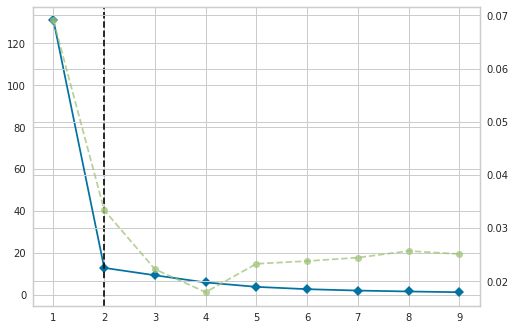

In [186]:
# 2020년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
visualizer.fit(set_20_sc.reshape(-1,1))

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

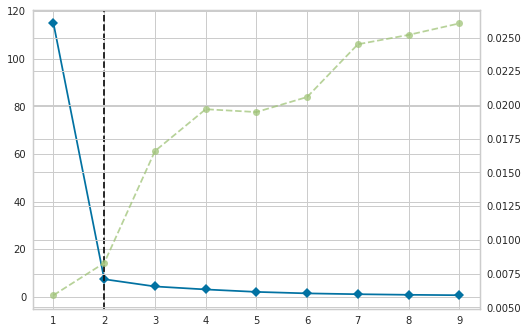

In [187]:
# 2021년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
visualizer.fit(set_21_sc.reshape(-1,1))

KElbowVisualizer(ax=<AxesSubplot:>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(1, 10))

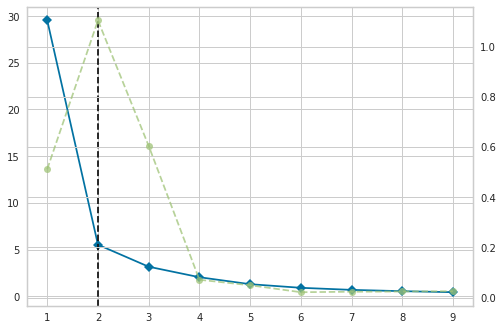

In [189]:
# 2022년
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k = (1,10))
visualizer.fit(set_22_sc.reshape(-1,1))

In [190]:
# 적절한 군집수 찾기 2. The Silhouette method
### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    # from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

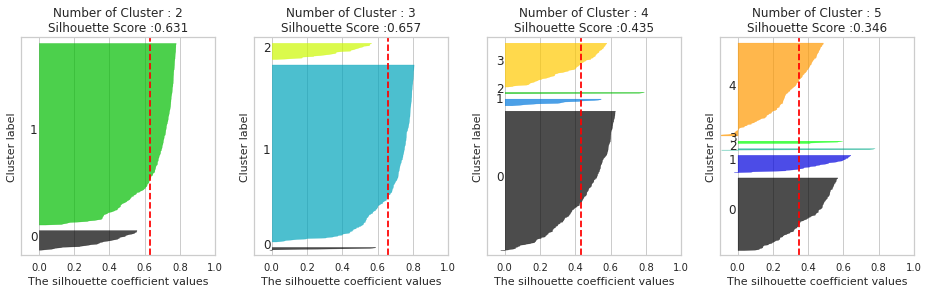

In [191]:
# 2020년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], set_20_sc)

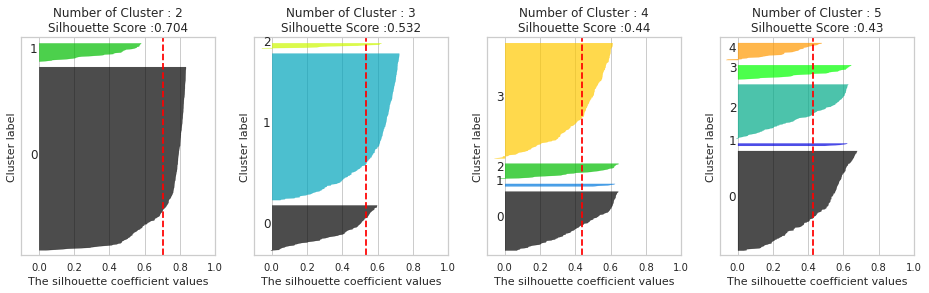

In [192]:
# 2021년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], set_21_sc)

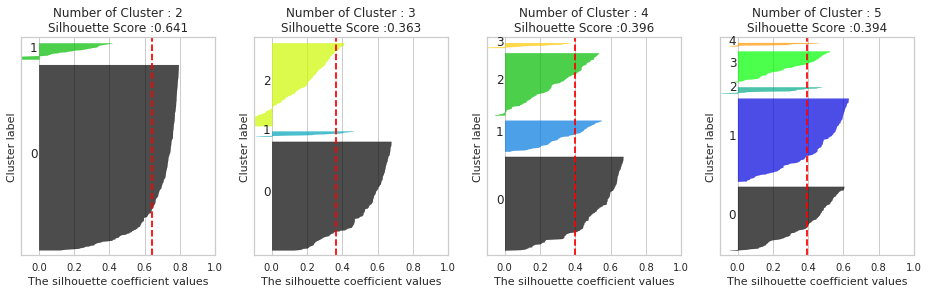

In [193]:
# 2022년
# cluster 개수를 3개, 4개, 5개, 6개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([2, 3, 4, 5], set_22_sc)

In [196]:
# 군집수 적용
km20 = KMeans(n_clusters=3, init='k-means++', random_state=119).fit(set_20_sc)
ratio_20['cluster'] = km20.predict(set_20_sc)

km21 = KMeans(n_clusters=3, init='k-means++', random_state=119).fit(set_21_sc)
ratio_21['cluster'] = km21.predict(set_21_sc)

km22 = KMeans(n_clusters=4, init='k-means++', random_state=119).fit(set_22_sc)
ratio_22['cluster'] = km22.predict(set_22_sc)

<ipython-input-196-ac72f8eb5f08>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_20['cluster'] = km20.predict(set_20_sc)
<ipython-input-196-ac72f8eb5f08>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratio_21['cluster'] = km21.predict(set_21_sc)
<ipython-input-196-ac72f8eb5f08>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

In [197]:
c_20 = ratio_20.drop(['year', 'code'], axis=1)
c_21 = ratio_21.drop(['year', 'code'], axis=1)
c_22 = ratio_22.drop(['year', 'code'], axis=1)

[Text(0.5, 1.0, '2020Y')]

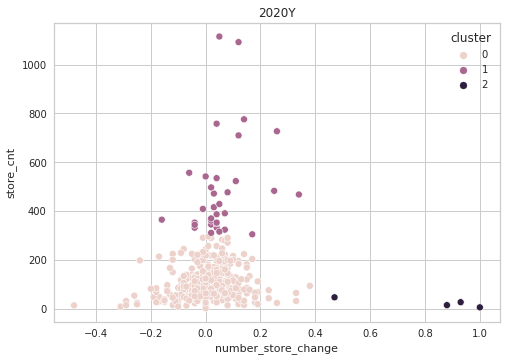

In [198]:
# 2020년
sct_2020 = sns.scatterplot(x='number_store_change', y='store_cnt', hue='cluster', data=c_20)
sct_2020.set(title = "2020Y")

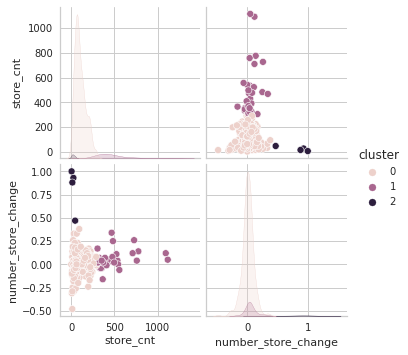

In [202]:
# 2020Y
sns.pairplot(c_20, hue = 'cluster')
plt.show()

[Text(0.5, 1.0, '2021Y')]

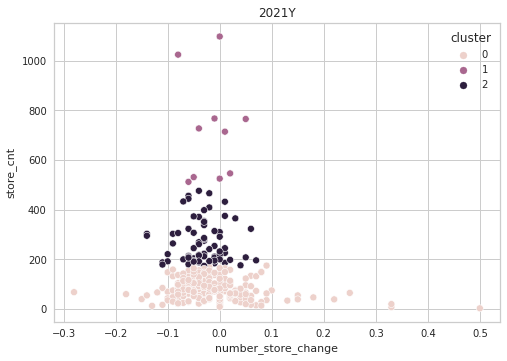

In [199]:
# 2021년
sct_2021 = sns.scatterplot(x='number_store_change', y='store_cnt', hue='cluster', data=c_21)
sct_2021.set(title = "2021Y")

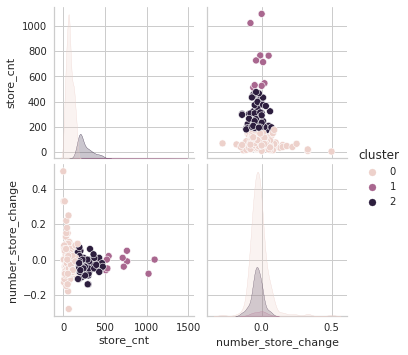

In [203]:
# 2021Y
sns.pairplot(c_21, hue = 'cluster')
plt.show()

[Text(0.5, 1.0, '2022Y')]

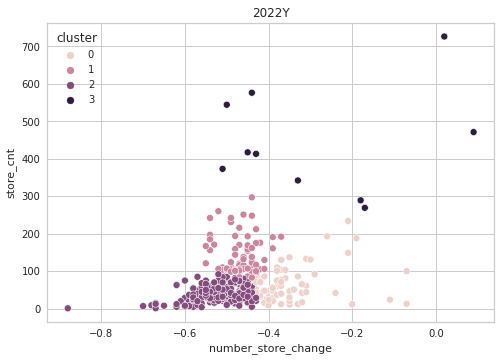

In [200]:
# 2022년
sct_2022 = sns.scatterplot(x='number_store_change', y='store_cnt', hue='cluster', data=c_22)
sct_2022.set(title = "2022Y")

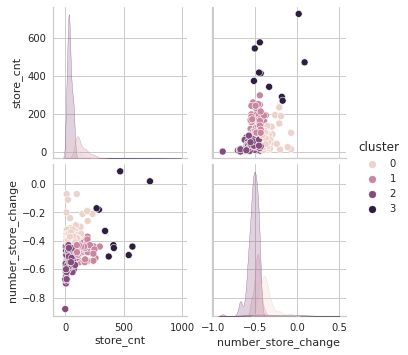

In [204]:
# 2022Y
sns.pairplot(c_22, hue = 'cluster')
plt.show()